In [1]:
!pip install --upgrade pandas==1.2

     |████████████████████████████████| 9.9 MB 26.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.2.0 which is incompatible.


In [1]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 26.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 52.6 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=1f38411fcc799f6d5d1302d8bedf958b2e313ae8161add6b85b0d007644aa21a
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompa

In [1]:
import pandas as pd
pd.__version__

'1.2.0'

In [2]:
import pyLDAvis
pyLDAvis.__version__

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

'3.3.1'

In [3]:
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


In [4]:
print("##문서 길이 : ",len(documents))
print("##문서 토픽 구성:\n",dataset.target_names)
print("##첫번째 문서 내용\n", documents[0])


##문서 길이 :  11314
##문서 토픽 구성:
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
##첫번째 문서 내용
 Well i'm not sure about the story nad it did seem biased. What
I disagree with is your statement that the U.S. Media is out to
ruin Israels reputation. That is rediculous. The U.S. media is
the most pro-israeli media in the world. Having lived in Europe
I realize that incidences such as the one described in the
letter have occured. The U.S. media as a whole seem to try to
ignore them. The U.S. is subsidizing Israels existance and the
Europeans are not (at least not to the same degree). So I think
that might be a reason they report more clearly on the
atroci

### **1-2. Data Frame**

In [5]:
import pandas as pd

article_df=pd.DataFrame({"article":documents})
article_df.head()

,article
0,Well i'm not sure about the story nad it did s...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re..."
2,Although I realize that principle is not one o...
3,Notwithstanding all the legitimate fuss about ...
4,"Well, I will have to change the scoring on my ..."


### **1-3.Explore data**

In [6]:
print("##total number of article##\n")
article_df["article"].shape[0]

##total number of article##



11314

In [7]:
print("##unique txt##\n")
article_df["article"].unique()

##unique txt##



array(["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
       "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a

In [8]:
article_df.replace("",float("NaN"),inplace=True)

In [9]:
article_df.isnull().any()

article    True
dtype: bool

In [10]:

article_df.dropna(inplace=True)
print("##total number of article after drop NaN##\n")
article_df["article"].shape[0]

##total number of article after drop NaN##



11096

In [11]:

# 특수 문자 제거
article_df['clean_article'] = article_df['article'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
article_df['clean_article'] = article_df['clean_article'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
article_df['clean_article'] = article_df['clean_article'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
article_df.head()

,article,clean_article
0,Well i'm not sure about the story nad it did s...,well sure about story seem biased what disagre...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read actually accept hard a...
2,Although I realize that principle is not one o...,although realize that principle your strongest...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss about this pro...
4,"Well, I will have to change the scoring on my ...",well will have change scoring playoff pool unf...


In [13]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_article = article_df['clean_article'].apply(lambda x: x.split()) # 토큰화
tokenized_article = tokenized_article.apply(lambda x: [item for item in x if item not in stop_words])

In [15]:
tokenized_article

0        [well, sure, story, seem, biased, disagree, st...
1        [yeah, expect, people, read, actually, accept,...
2        [although, realize, principle, strongest, poin...
3        [notwithstanding, legitimate, fuss, proposal, ...
4        [well, change, scoring, playoff, pool, unfortu...
                               ...                        
11309    [danny, rubenstein, israeli, journalist, speak...
11310                                                   []
11311    [agree, home, runs, clemens, always, memorable...
11312    [used, deskjet, orange, micros, grappler, syst...
11313    [argument, murphy, scared, hell, came, last, y...
Name: clean_article, Length: 11096, dtype: object

In [16]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_article)
corpus = [dictionary.doc2bow(text) for text in tokenized_article]
print(corpus[1]) # 수행된 결과에서 두번째 뉴스 출력. 첫번째 문서의 인덱스는 0

/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[(52, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 1), (70, 1), (71, 2), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1)]


In [17]:
print("56번으로 인코딩된 단어 : ",dictionary[55])
print("총 학습된 단어의 갯수 : ",len(dictionary))

56번으로 인코딩된 단어 :  accept
총 학습된 단어의 갯수 :  64281


In [18]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

In [19]:
min_topics,max_topics=20,25
coherence_scores=[]

for num_topics in range(min_topics,max_topics):
  model=LdaModel(corpus, num_topics=num_topics,id2word=dictionary)
  coherence=CoherenceModel(model=model, texts=tokenized_article, dictionary=dictionary)
  coherence_scores.append(coherence.get_coherence())

print(coherence_scores)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

[0.47324207622212155, 0.4492747099006585, 0.4854132158632796, 0.48827036624577147, 0.5172273372197157]


Text(0, 0.5, 'Coherence Scores')

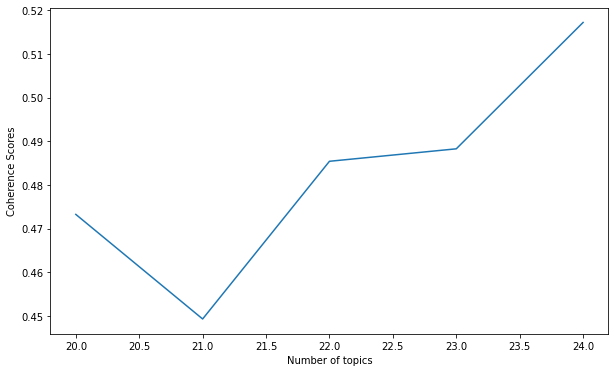

In [20]:
import matplotlib.pyplot as plt

x=[int(i) for i in range(min_topics,max_topics)]
plt.figure(figsize=(10,6))
plt.plot(x,coherence_scores)
plt.xlabel("Number of topics")
plt.ylabel("Coherence Scores")
#24가 제일 작음

In [21]:
LDA=LdaModel(corpus, num_topics=20,id2word=dictionary)
topics=LDA.print_topics()

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [22]:
for topic in topics:
    print(topic)

(0, '0.013*"chip" + 0.009*"clipper" + 0.008*"keys" + 0.006*"algorithm" + 0.005*"number" + 0.005*"unit" + 0.005*"used" + 0.005*"serial" + 0.005*"secret" + 0.005*"chips"')
(1, '0.014*"would" + 0.009*"like" + 0.007*"know" + 0.006*"time" + 0.006*"think" + 0.005*"people" + 0.005*"well" + 0.005*"also" + 0.004*"much" + 0.004*"please"')
(2, '0.020*"entry" + 0.018*"file" + 0.012*"program" + 0.007*"section" + 0.007*"windows" + 0.007*"info" + 0.007*"files" + 0.007*"build" + 0.007*"oname" + 0.007*"line"')
(3, '0.006*"keyboard" + 0.004*"true" + 0.003*"cluster" + 0.003*"would" + 0.003*"absolute" + 0.003*"universe" + 0.002*"time" + 0.002*"people" + 0.002*"well" + 0.002*"truth"')
(4, '0.011*"game" + 0.008*"play" + 0.008*"period" + 0.007*"team" + 0.007*"nrhj" + 0.007*"season" + 0.006*"hockey" + 0.006*"games" + 0.005*"kings" + 0.005*"pittsburgh"')
(5, '0.009*"armenian" + 0.007*"turkish" + 0.007*"president" + 0.006*"turkey" + 0.006*"jews" + 0.006*"russian" + 0.005*"armenians" + 0.005*"would" + 0.004*"peo

In [23]:
import pyLDAvis.gensim_models


In [24]:
pyLDAvis.enable_notebook()
LDA = pyLDAvis.gensim_models.prepare(LDA, corpus, dictionary)
pyLDAvis.display(LDA)